In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
sns.set_theme()
from scipy.interpolate import PchipInterpolator

In [2]:
np.random.seed(42)

In [3]:
# Define parameters
T = 100
time = np.arange(1, T + 1)

# Gaussian distribution
mu_gauss = 0.5
sigma_gauss = 0.1

# Weibull distribution
shape_weibull = 0.63
scale_weibull = 0.33

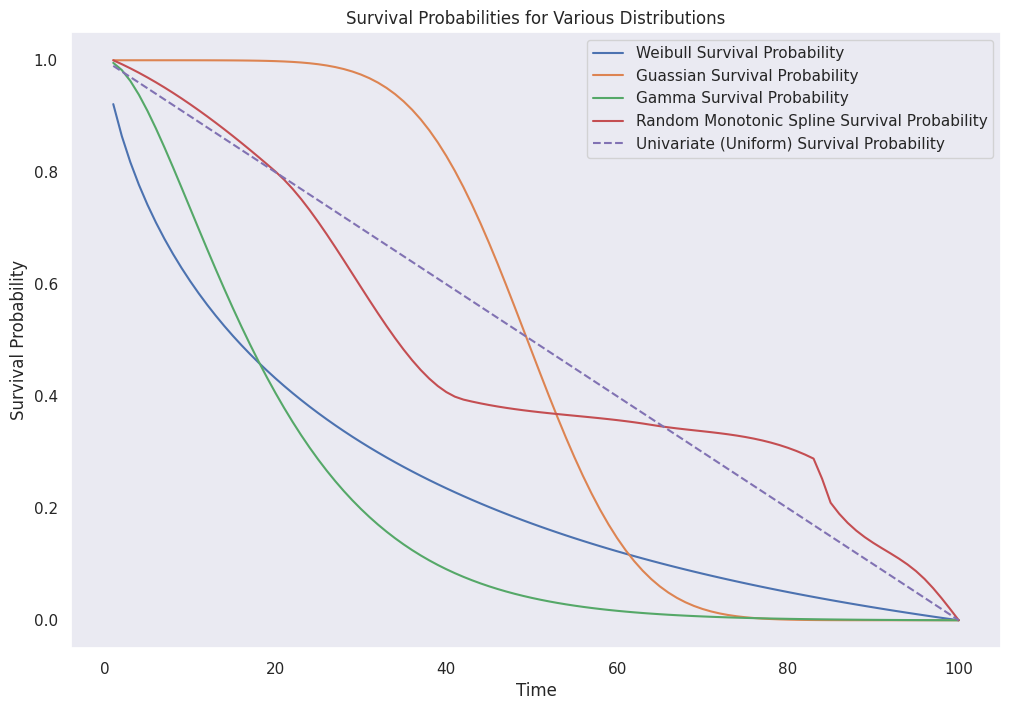

In [4]:
# Define additional distributions and their CDFs

# Exponential distribution
rate_exp = 1 / T  # Rate parameter (lambda)
cdf_exp = scipy.stats.expon.cdf(time, scale=1 / rate_exp)
cdf_exp /= cdf_exp[-1]

# Gamma distribution
shape_gamma = 2.0
scale_gamma = 10.0
cdf_gamma = scipy.stats.gamma.cdf(time, a=shape_gamma, scale=scale_gamma)
cdf_gamma /= cdf_gamma[-1]

# Log-logistic distribution
shape_loglogistic = 2.0
scale_loglogistic = 50.0
cdf_loglogistic = 1 / (1 + (scale_loglogistic / time) ** shape_loglogistic)
cdf_loglogistic /= cdf_loglogistic[-1]

# Univariate example (we'll use a simple uniform distribution)
cdf_univariate = np.cumsum(np.ones(T) / T)
cdf_univariate /= cdf_univariate[-1]

# Recalculate Weibull and Normal
cdf_weibull = np.cumsum(scipy.stats.weibull_min.pdf(time, c=shape_weibull, scale=scale_weibull * T))
cdf_weibull /= cdf_weibull[-1]

cdf_gauss = np.cumsum(scipy.stats.norm.pdf(time, loc=mu_gauss * T, scale=sigma_gauss * T))
cdf_gauss /= cdf_gauss[-1]

# Random monotonic spline distribution
knots = 8
knot_times = sorted([1, T] + np.random.choice(range(2, T), knots - 2, replace=False).tolist())
knot_heights = sorted([0, 1] + np.random.uniform(0, 1, knots - 2).tolist())
monotonic_spline = PchipInterpolator(knot_times, knot_heights, extrapolate=True)
cdf_spline = monotonic_spline(time)
cdf_spline = np.clip(cdf_spline, 0, 1)

# Plot all CDFs
plt.figure(figsize=(12, 8))
# plt.plot(time, 1 - cdf_exp, label="Exponential Survival Probability")
plt.plot(time, 1 - cdf_weibull, label="Weibull Survival Probability")
plt.plot(time, 1 - cdf_gauss, label="Guassian Survival Probability")
plt.plot(time, 1 - cdf_gamma, label="Gamma Survival Probability")
# plt.plot(time, 1 - cdf_loglogistic, label="Log-Logistic Survival Probability")
plt.plot(time, 1 - cdf_spline, label="Random Monotonic Spline Survival Probability")
plt.plot(time, 1 - cdf_univariate, label="Univariate (Uniform) Survival Probability", linestyle="--")

# Labels and legend
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Survival Probabilities for Various Distributions")
plt.legend()
plt.grid()
plt.show()